In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from math import sqrt

from sklearn.svm import LinearSVC, LinearSVR
from sklearn.metrics import accuracy_score, classification_report, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


import statsmodels.api as sm

from IPython.display import display
import pickle

In [37]:
df_1 = pd.read_csv("../data/kappa_distance_2021.csv")
data = df_1.copy(deep=True)

In [38]:
data.head()

,Unnamed: 0,timestamp,kappa,distance
0,0,2021-01-01 00:02:24,4.747468,1.772268
1,1,2021-01-02 00:02:24,10.500496,1.998574
2,2,2021-01-03 00:02:24,11.024607,1.892996
3,3,2021-01-04 00:02:24,14.888399,1.946318
4,4,2021-01-05 00:02:24,17.697876,1.977037


In [39]:
data.drop(columns="Unnamed: 0", inplace=True)

In [40]:
# timestampを変換する
data["timestamp"] = pd.to_datetime(data["timestamp"])

In [41]:
data.shape

(364, 3)

In [42]:
X = data.distance.values.reshape(-1, 1)
y = data.kappa.values

In [43]:
y

array([ 4.74746754, 10.50049625, 11.02460691, 14.8883995 , 17.69787644,
       18.37434486, 18.49013675, 17.85023419, 20.86082336, 14.56540106,
       16.02803548, 19.47741498, 20.80597457, 16.86905027, 18.66077743,
       14.13270505, 11.01241829, 16.6435608 , 14.85183364, 12.38973237,
       19.56273532, 14.13879936, 15.44907602, 13.35263336, 14.12051643,
        6.22838489, 10.65894831, 12.29222341, 14.70557019, 10.01295144,
        2.09644266,  8.58078858, 11.00632398, 12.68225925,  7.94698033,
        5.89319784,  3.73581207,  2.99840055,  4.85716512,  6.70983538,
        6.27713937,  6.63060935,  8.64782599,  3.32139899,  2.6022704 ,
        1.84048164,  1.2737108 ,  2.82775987,  3.67486897,  4.4793179 ,
        5.10093753,  4.07709344,  7.21566312, 13.49280249, 15.30281258,
       15.54049067, 18.2829302 , 28.55184267, 14.84573933, 16.25961926,
       19.54445239, 25.70579987, 18.97158724, 24.20659959, 27.08311394,
       25.34014126, 36.91323608, 42.33107773, 32.58018162, 33.64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [45]:
# ハイパーパラメータのチューニング
params = {
    "n_estimators":[4, 8, 16, 32, 64, 128, 256, 512, 1024],
    "max_depth":[8, 16, 32, 64, 128, 256, 512, 1024],
    "max_leaf_nodes":[5, 10, 15, 20, 25, 30, 35, 40],
    "n_jobs":[-1]
}

In [46]:
cv = GridSearchCV(
    RandomForestRegressor(),
    params,
    verbose=2
)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=16, n_jobs=-1; total ti

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 16, 32, 64, 128, 256, 512, 1024],
                         'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 35, 40],
                         'n_estimators': [4, 8, 16, 32, 64, 128, 256, 512,
                                          1024],
                         'n_jobs': [-1]},
             verbose=2)

In [49]:
forest = cv.best_estimator_
preds = forest.predict(X_test)
print("精度検証", mean_squared_error(y_test, preds))

精度検証 278.58419782707676


In [48]:
with open("../data/model/kappa_distance_2021.pkl", "wb") as f:
    pickle.dump(forest, f, protocol=4)

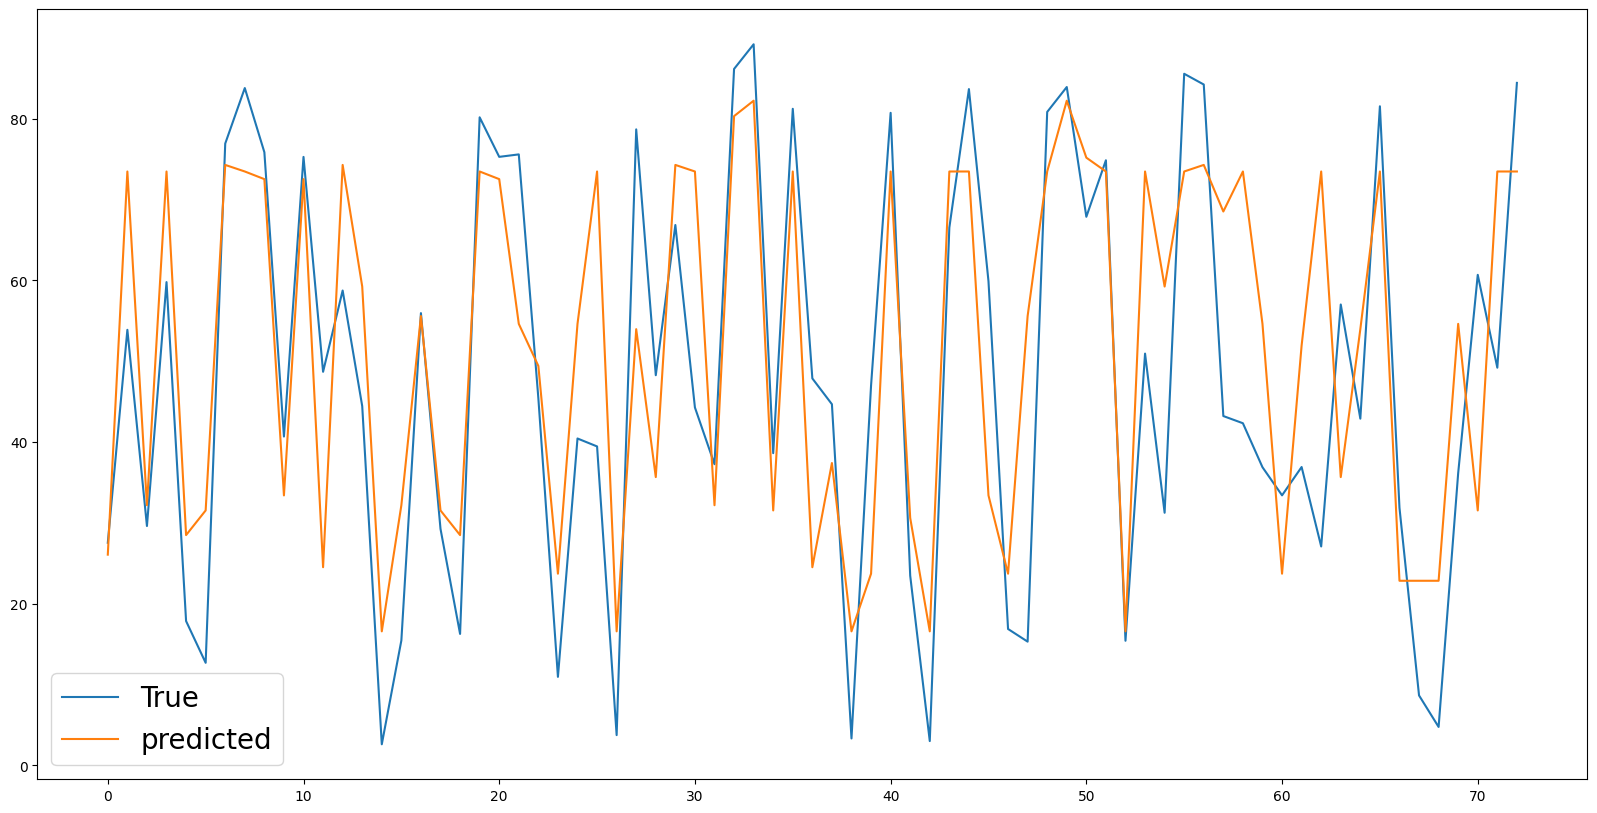

In [50]:
plt.figure(figsize=(20, 10))
plt.plot(y_test, label="True")
plt.plot(preds, label="predicted")
plt.legend(prop={"size": 20})
plt.show()

In [51]:
# r2_score
print("r2_score", r2_score(y_test, preds))

r2_score 0.5746025797005692


In [24]:
df_2 = pd.read_csv("../data/kappa_distance_2022_2023.csv")

In [25]:
data_2 = df_2.copy(deep=True)

data_2.head()

,Unnamed: 0,timestamp,kappa,distance
0,0,2022-01-01 00:00:05,27.591274,1.872685
1,1,2022-01-02 00:00:05,24.092994,1.700836
2,2,2022-01-03 00:00:05,38.763201,1.685314
3,3,2022-01-04 00:00:05,55.144933,1.768618
4,4,2022-01-05 00:00:05,34.098828,1.597567


In [26]:
data_2.drop(columns="Unnamed: 0", inplace=True)

# timestampを変換する
data_2["timestamp"] = pd.to_datetime(data_2["timestamp"])

In [30]:
X = data_2.distance.values.reshape(-1, 1)
y = data_2.kappa.values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# ハイパーパラメータのチューニング
params = {
    "n_estimators":[4, 8, 16, 32, 64, 128, 256, 512, 1024],
    "max_depth":[8, 16, 32, 64, 128, 256, 512, 1024],
    "max_leaf_nodes":[5, 10, 15, 20, 25, 30, 35, 40],
    "n_jobs":[-1]
}

cv = GridSearchCV(
    RandomForestRegressor(),
    params,
    verbose=2
)

cv.fit(X_train, y_train)

forest = cv.best_estimator_
preds = forest.predict(X_test)
print("精度検証", mean_squared_error(y_test, preds))

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=4, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=8, n_jobs=-1; total time=   0.0s
[CV] END max_depth=8, max_leaf_nodes=5, n_estimators=16, n_jobs=-1; total ti

In [36]:
with open("../data/model/forest_2022_2023.pkl", "wb") as f:
    pickle.dump(forest, f, protocol=4)

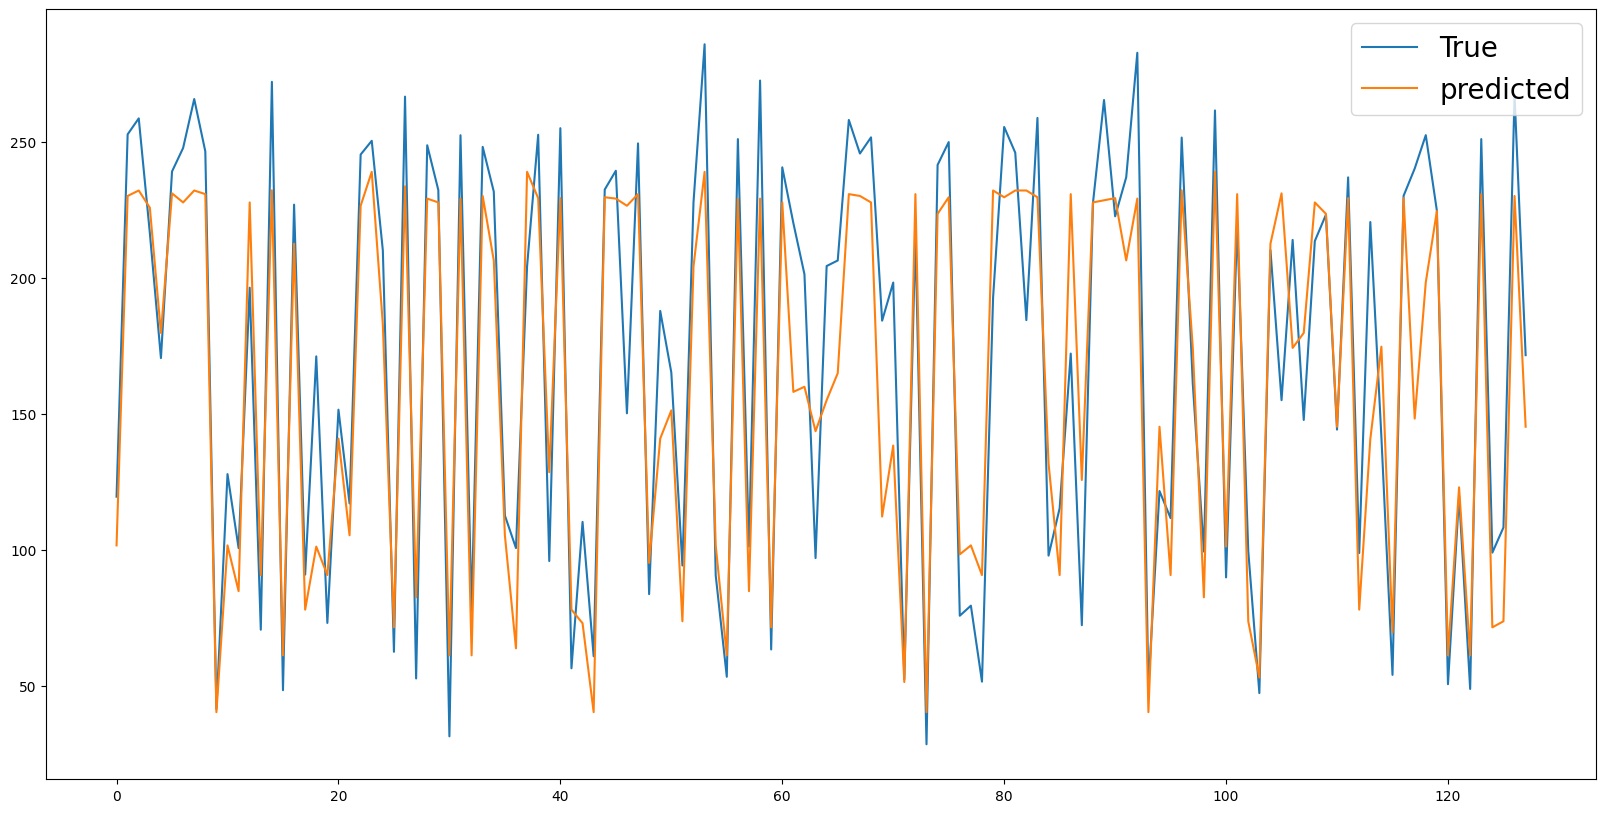

In [32]:
plt.figure(figsize=(20, 10))
plt.plot(y_test, label="True")
plt.plot(preds, label="predicted")
plt.legend(prop={"size": 20})
plt.show()

In [33]:
print("r2_score", r2_score(y_test, preds))

r2_score 0.8367620913238306
